# World Happiness Ranking - 2016

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
df = pd.read_csv('Happiness Report 2015-2022.csv', index_col='Unnamed: 0')

Displaying the data

In [76]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,Rwanda*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0,621","0,187","0,544",NaN,143.0,"3,268","3,462","3,074","0,536","0,785"
1227,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0,329","0,106","0,105",NaN,144.0,"2,995","3,110","2,880","0,548","0,947"
1228,Lebanon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0,103","0,082","0,034",NaN,145.0,"2,955","3,049","2,862","0,216","1,392"
1229,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0,000","0,089","0,005",NaN,146.0,"2,404","2,469","2,339","1,263","0,758"


Let's take a quick look at the dataframe and see what we're dealing with.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 1230
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     617 non-null    object 
 1   Region                                      315 non-null    object 
 2   Happiness Rank                              315 non-null    float64
 3   Happiness Score                             315 non-null    float64
 4   Standard Error                              158 non-null    float64
 5   Economy (GDP per Capita)                    315 non-null    float64
 6   Family                                      470 non-null    float64
 7   Health (Life Expectancy)                    315 non-null    float64
 8   Freedom                                     470 non-null    float64
 9   Trust (Government Corruption)               315 non-null    float64
 10  Generosity  

Looks like there are a lot of missing values. I'll drop the missing values in both the Region and Happiness Rank columns

In [78]:
df = df.dropna(subset=['Region', 'Happiness Rank'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     315 non-null    object 
 1   Region                                      315 non-null    object 
 2   Happiness Rank                              315 non-null    float64
 3   Happiness Score                             315 non-null    float64
 4   Standard Error                              158 non-null    float64
 5   Economy (GDP per Capita)                    315 non-null    float64
 6   Family                                      315 non-null    float64
 7   Health (Life Expectancy)                    315 non-null    float64
 8   Freedom                                     315 non-null    float64
 9   Trust (Government Corruption)               315 non-null    float64
 10  Generosity    

Now let's drop empty columns

In [80]:
df = df.dropna(axis=1)

In [81]:
df['year'].unique()

array([2015, 2016], dtype=int64)

Looks like we have data for both the year 2015 and 2016. We need to filter it to show only 2016 so that we avoid duplicates

In [82]:
df = df[df['year'] == 2016]

The following table shows the top 10 happiest countries in the world in 2016

In [83]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
158,Denmark,Western Europe,1.0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
159,Switzerland,Western Europe,2.0,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
160,Iceland,Western Europe,3.0,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
161,Norway,Western Europe,4.0,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
162,Finland,Western Europe,5.0,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
163,Canada,North America,6.0,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,2016
164,Netherlands,Western Europe,7.0,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,2016
165,New Zealand,Australia and New Zealand,8.0,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553,2016
166,Australia,Australia and New Zealand,9.0,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,2016
167,Sweden,Western Europe,10.0,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,2016


7 out of the top 10 happiest countries are in Europe

In [84]:
df.head(10)['Region'].value_counts()

Western Europe               7
Australia and New Zealand    2
North America                1
Name: Region, dtype: int64

In [85]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807,2016.0
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220,0.0
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890,2016.0
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710,2016.0
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740,2016.0
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650,2016.0
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720,2016.0


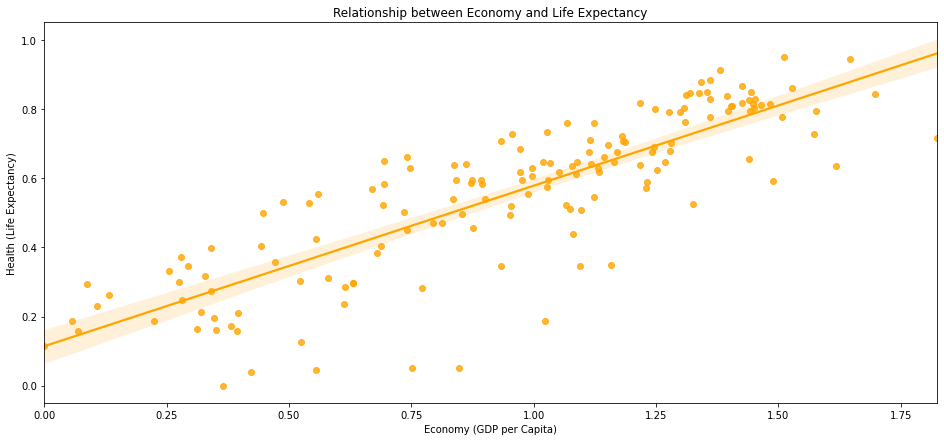

In [86]:
plt.figure(figsize=(16,7))
plt.title('Relationship between Economy and Life Expectancy')
sns.regplot(x='Economy (GDP per Capita)', y='Health (Life Expectancy)', data=df, color='orange')
plt.show()

The above graph shows that there is a direct relationship between the country's economy (GDP per Capita) and Life Expectancy. This makes sense because people who live in wealthy countries have higher standards of living, better health services an education. On the other hand, people who live in poor countries might not have access to high quality hospitals or enough medicine. Moreoever, Not having access to basic needs such as clean water can have a dramatic negative effect on life expectancy.

In [88]:
regions = df.groupby('Region')

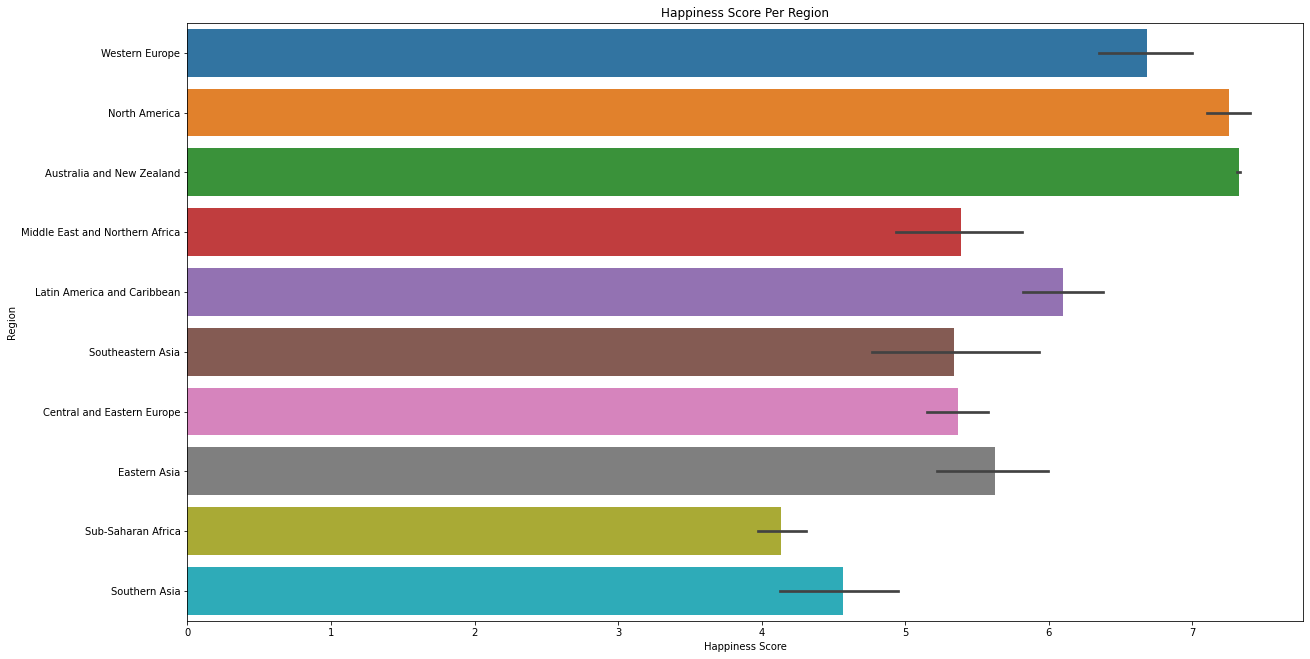

In [89]:
plt.figure(figsize=(20,11))
plt.title('Happiness Score Per Region')
sns.barplot(x='Happiness Score', y='Region', data=df, orient='h')
plt.show()

The above graph shows the happiness score per region. We can clearly see that Australia and New Zealand, North America and Western Europe have the highest happiness score

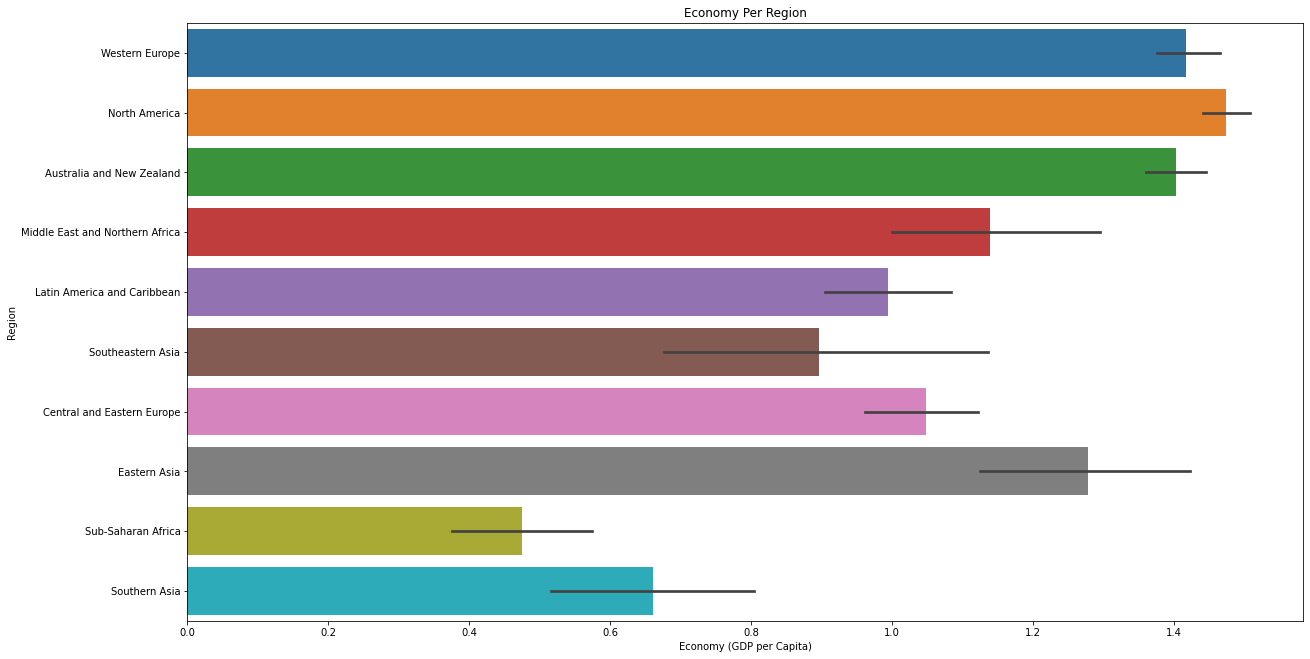

In [90]:
plt.figure(figsize=(20,11))
plt.title('Economy Per Region')
sns.barplot(x='Economy (GDP per Capita)', y='Region', data=df, orient='h')
plt.show()

The above graph shows how the regions compare to each other in terms of Economy (GDP per Capita). Again, we notice that Australia and New Zealand, North America and Western Europe are leading in this category. This proves that better economy leads to better standards of living (Happiness) which in turn leads to higher life expectancy as illustrated in the graph below:

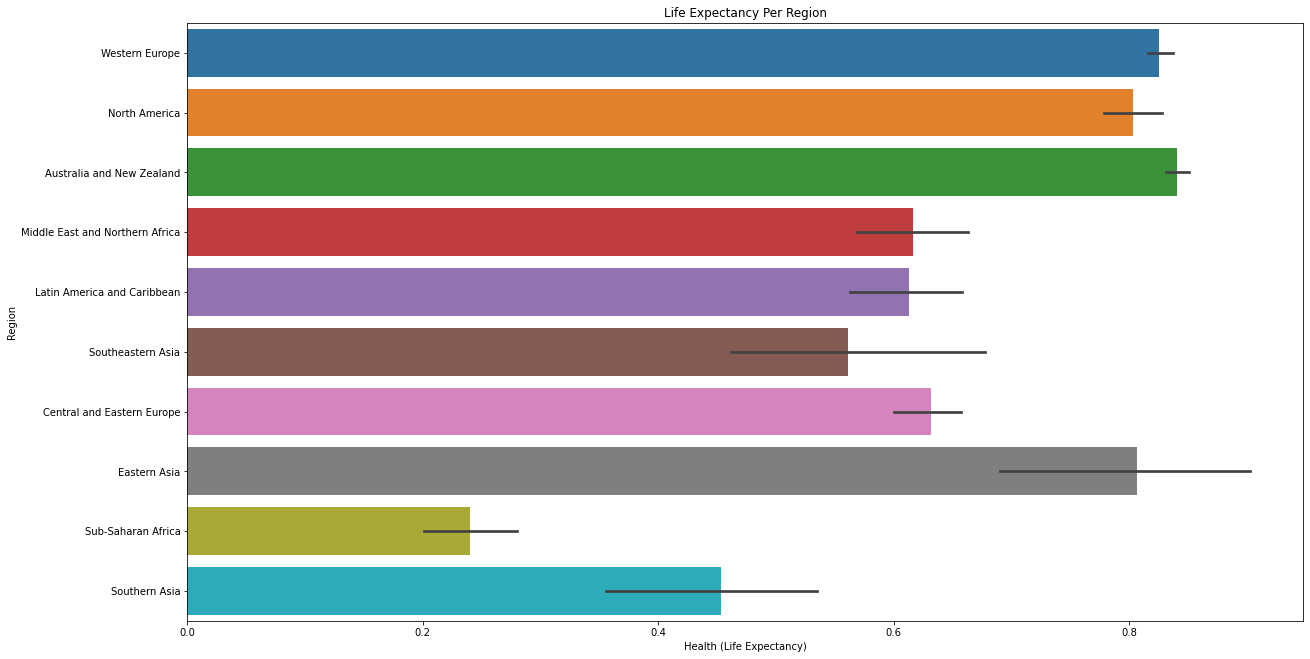

In [91]:
plt.figure(figsize=(20,11))
plt.title('Life Expectancy Per Region')
sns.barplot(x='Health (Life Expectancy)', y='Region', data=df, orient='h')
plt.show()

The table below shows the top country in terms of Happiness in each region.

In [92]:
df.drop_duplicates(subset=['Region'], keep='first').set_index("Region")

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
Region,,,,,,,,,,,
Western Europe,Denmark,1.0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
North America,Canada,6.0,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,2016
Australia and New Zealand,New Zealand,8.0,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553,2016
Middle East and Northern Africa,Israel,11.0,7.267,1.33766,0.99537,0.84917,0.36432,0.08728,0.32288,3.31029,2016
Latin America and Caribbean,Costa Rica,14.0,7.087,1.06879,1.02152,0.76146,0.55225,0.10547,0.22553,3.35168,2016
Southeastern Asia,Singapore,22.0,6.739,1.64555,0.86758,0.94719,0.48770,0.46987,0.32706,1.99375,2016
Central and Eastern Europe,Czech Republic,27.0,6.596,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,2.96211,2016
Eastern Asia,Taiwan,34.0,6.379,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495,2.61523,2016
Sub-Saharan Africa,Mauritius,66.0,5.648,1.14372,0.75695,0.66189,0.46145,0.05203,0.36951,2.20223,2016


### This concludes my analysis of the World Happiness Ranking in 2016